In [12]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten,Dense
import tensorflow as tf
import numpy as np
import os
import matplotlib.pyplot as plt



In [13]:
resnet_model=Sequential()
# Create an instance of the ResNet50 model
pre_train_model = ResNet50(include_top=False,weights='imagenet',
    input_shape=(256,256,3),
    classes=4,)
for layer in pre_train_model.layers:
    layer.trainable=False

resnet_model.add(pre_train_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(512, activation='relu')) 
# resnet_model.add(Dense(512, activation='relu')) 
resnet_model.add(Dense(4, activation= 'softmax'))

resnet_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 8, 8, 2048)        23587712  
                                                                 
 flatten_1 (Flatten)         (None, 131072)            0         
                                                                 
 dense_2 (Dense)             (None, 512)               67109376  
                                                                 
 dense_3 (Dense)             (None, 4)                 2052      
                                                                 
Total params: 90,699,140
Trainable params: 67,111,428
Non-trainable params: 23,587,712
_________________________________________________________________


In [14]:

images=tf.data.Dataset.list_files('/mnt/c/Users/Jim/Desktop/data/*/*')
for image in images.take(3):
    print(image)
    
image_count=len(images)
print(image_count)

tf.Tensor(b'/mnt/c/Users/Jim/Desktop/data/Screen/HLKWQA9DGDRL.png', shape=(), dtype=string)
tf.Tensor(b'/mnt/c/Users/Jim/Desktop/data/Screen/frame_0062.png', shape=(), dtype=string)
tf.Tensor(b'/mnt/c/Users/Jim/Desktop/data/Mouse/3UCATA18YHH1.png', shape=(), dtype=string)
2328


2023-06-01 22:10:23.265100: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [2328]
	 [[{{node Placeholder/_0}}]]
2023-06-01 22:10:23.265342: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [2328]
	 [[{{node Placeholder/_0}}]]


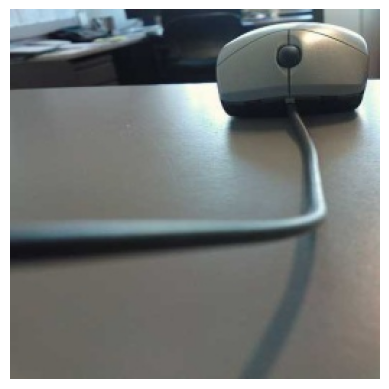

In [15]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Load the image file
image = mpimg.imread("/mnt/c/Users/Jim/Desktop/data/Mouse/08WBAV853XST.png")

# Display the image
plt.imshow(image)
plt.axis('off')
plt.show()

In [16]:
from PIL import Image
import numpy as np
import os

folder_path = "/mnt/c/Users/Jim/Desktop/data/Mouse/"  # Replace with the path to your folder

# Get a list of all PNG files in the folder
png_files = [file for file in os.listdir(folder_path) if file.endswith(".png")]

# Iterate over each PNG file
for file_name in png_files:
    # Open the image file
    file_path = os.path.join(folder_path, file_name)
    image = Image.open(file_path)

    # Convert the image to a NumPy array
    image_array = np.array(image)

    # Process the image array as needed
    # ...

    # Print the shape and data type of the array
#     print("Array shape:", image_array.shape)
#     print("Array data type:", image_array.dtype)
# #     print(image_array)

In [17]:
import tensorflow as tf


# Specify the directory containing the images
data_dir = "/mnt/c/Users/Jim/Desktop/data/"

# Create a TensorFlow dataset from the directory
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    image_size=(256, 256),
    batch_size=32,
    validation_split=0.2,
    seed=42,
    subset="training"
)


Found 2328 files belonging to 4 classes.
Using 1863 files for training.


In [18]:
ds_training = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=29,
    validation_split=0.2,
    subset='training',
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False
)


Found 2328 files belonging to 4 classes.
Using 1863 files for training.


In [19]:
ds_training.class_names

['Dvdreader', 'Keyboard', 'Mouse', 'Screen']

In [20]:
ds_validation = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=29,
    validation_split=0.2,
    subset='validation',
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 2328 files belonging to 4 classes.
Using 465 files for validation.


In [22]:
dataset = dataset.prefetch(buffer_size=tf.data.AUTOTUNE)

# # Map labels to one-hot encoded format
# num_classes = 4 # Number of classes in ImageNet
# # ds_training = ds_training.map(lambda x, y: (x, tf.one_hot(y, num_classes)))
# ds_training = ds_training.map(lambda x, y: (x, tf.one_hot(tf.cast(y, dtype=tf.int32), num_classes)))
from tensorflow.keras.callbacks import EarlyStopping
es = EarlyStopping(patience=3, monitor="val_accuracy", restore_best_weights=True)

# # Compile the model
resnet_model.compile( optimizer='adam',loss='sparse_categorical_crossentropy', metrics = 'accuracy')

# # Train the model

history = resnet_model.fit(ds_training, validation_data=ds_validation, epochs=10, callbacks=[es],batch_size=32)
# print("Evaluation results:")
# for metric_name, result in zip(resnet_model.metrics_names, results):
#     print(f"{metric_name}: {result}")

Epoch 1/10
59/59 [==============================] - 284s 5s/step - loss: 0.3478 - accuracy: 0.9946 - val_loss: 5.3972 - val_accuracy: 0.9849
Epoch 2/10
59/59 [==============================] - 322s 5s/step - loss: 0.6420 - accuracy: 0.9946 - val_loss: 4.4584 - val_accuracy: 0.9849
Epoch 3/10
59/59 [==============================] - 305s 5s/step - loss: 0.5963 - accuracy: 0.9957 - val_loss: 3.1265 - val_accuracy: 0.9957
Epoch 4/10
59/59 [==============================] - 353s 6s/step - loss: 1.6492 - accuracy: 0.9930 - val_loss: 4.3422 - val_accuracy: 0.9892
Epoch 5/10
59/59 [==============================] - 307s 5s/step - loss: 0.8455 - accuracy: 0.9962 - val_loss: 5.5984 - val_accuracy: 0.9914
Epoch 6/10
59/59 [==============================] - 335s 6s/step - loss: 0.0635 - accuracy: 0.9989 - val_loss: 6.0200 - val_accuracy: 0.9892


In [ ]:

# num_classes = tf.data.experimental.cardinality(ds_validation).numpy()
# # num_classes=4
# # Convert target labels to one-hot encoding
# ds_validation = ds_validation.map(lambda x, y: (x, tf.one_hot(tf.cast(y, dtype=tf.int32), num_classes)))

# # Evaluate the model
# results = resnet_model.evaluate(ds_validation)

# print("Evaluation results:")
# for metric_name, result in zip(resnet_model.metrics_names, results):
#     print(f"{metric_name}: {result}")

In [27]:
def plot_loss_accuracy(history):

    with plt.style.context('seaborn-deep'):

        fig, ax = plt.subplots(1, 2, figsize=(15, 4))

        ## Plot Losses and Accuracies
        x_axis = np.arange(len(history.history['loss']))

        ax[0].set_title("Loss")
        ax[0].plot(x_axis, history.history['loss'], color="blue", linestyle=":", marker="X", label="Train Loss")
        ax[0].plot(x_axis, history.history['val_loss'], color="orange", linestyle="-", marker="X", label="Val Loss")

        ax[1].set_title("Accuracy")
        ax[1].plot(x_axis, history.history['accuracy'], color="blue", linestyle=":", marker="X", label="Train Accuracy")
        ax[1].plot(x_axis,
                   history.history['val_accuracy'],
                   color="orange",
                   linestyle="-",
                   marker="X",
                   label="Val Accuracy")

        ## Customization
        ax[0].grid(axis="x", linewidth=0.5)
        ax[0].grid(axis="y", linewidth=0.5)
        ax[0].legend()
        ax[1].grid(axis="x", linewidth=0.5)
        ax[1].grid(axis="y", linewidth=0.5)
        ax[1].legend()

        plt.show()

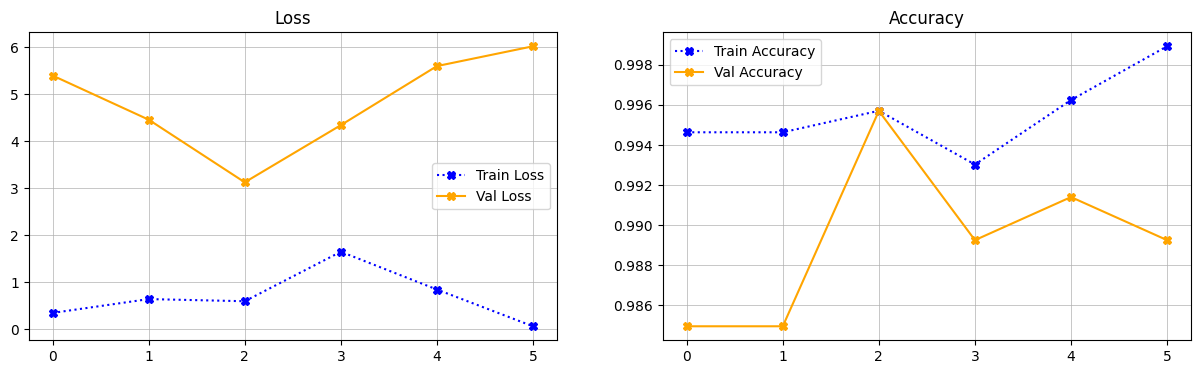

In [28]:
plot_loss_accuracy(history)